## model evaluation.

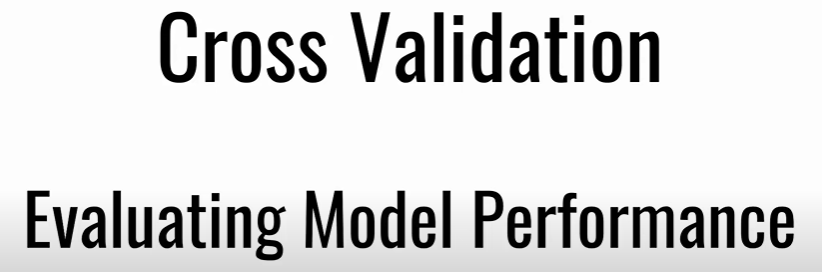

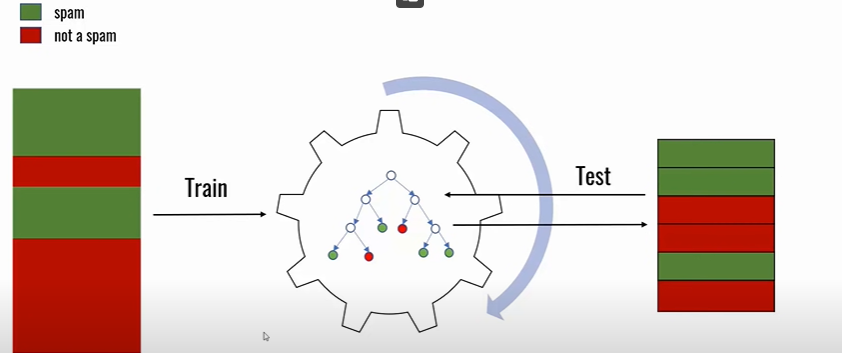

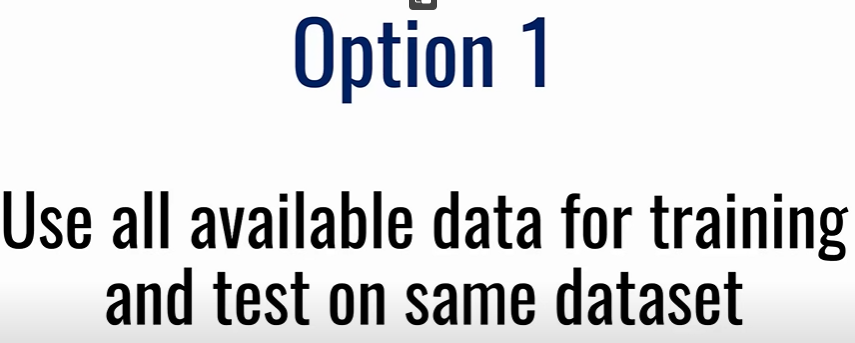

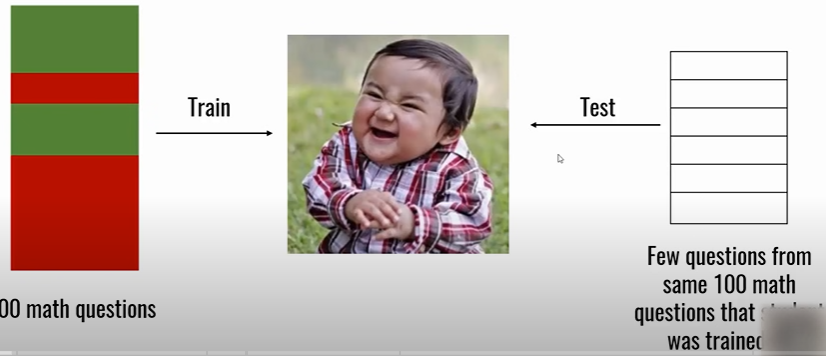

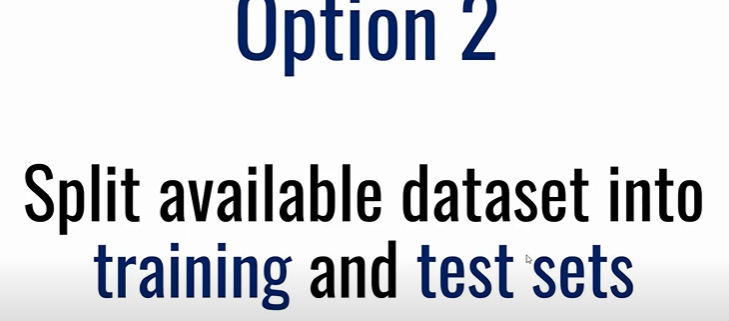

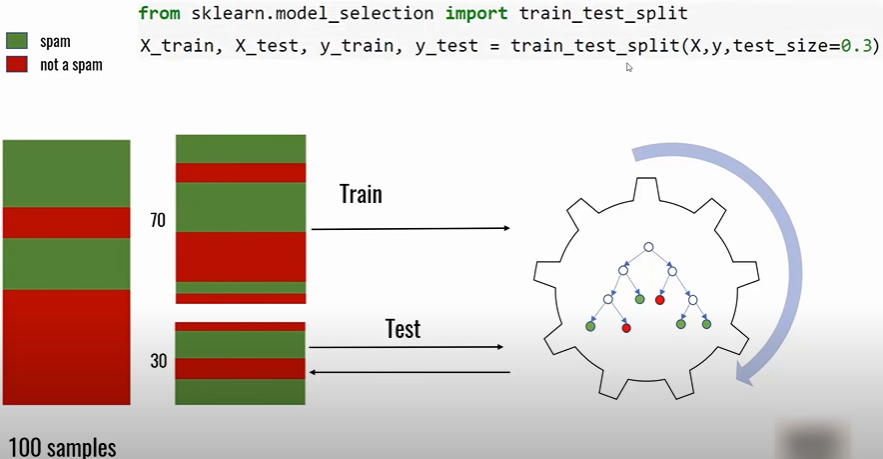

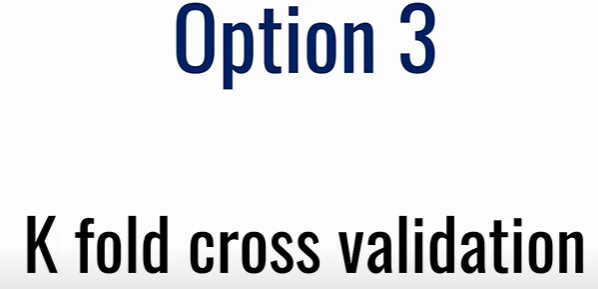

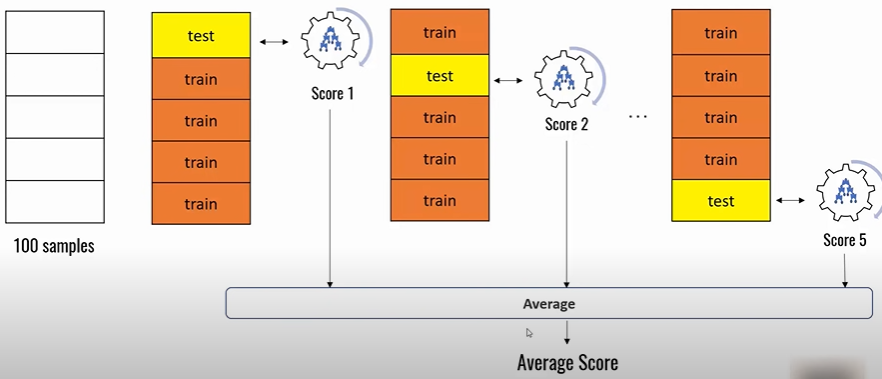

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

Logistic Regression

In [23]:
X_train.shape

(1198, 64)

In [24]:
y_train.shape

(1198,)

In [3]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9537037037037037

Parameters:

solver='liblinear': specifies the optimization algorithm to use for finding the optimal parameters. 'liblinear' is a good choice for small to medium-sized datasets.

multi_class='ovr': specifies how to handle multi-class classification problems. 'ovr' stands for "one-vs-rest", which means the classifier will train one model for each class, where the positive class is the class being trained for, and the rest are considered negative.

One-vs-Rest (OvR) Strategy:

In the OvR strategy:

The classifier trains one model for each class.

For each class, the positive class is the class being trained for, and the rest are considered negative.

The classifier predicts the class with the highest probability.

SVM

In [4]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.39814814814814814

Random Forest

In [ ]:

rf = RandomForestClassifier(n_estimators=40) # an estimator is a decision tree. 40 trees create forest.
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9685185185185186

In [ ]:
# How does RandomForestClassifier work?
# RandomForestClassifier combines multiple decision trees to improve the accuracy and robustness of the model. Here's a simplified overview:
# Bootstrap sampling: Randomly select a subset of samples from the training data.
# Decision tree training: Train a decision tree on the bootstrapped samples.
# Feature selection: Randomly select a subset of features to consider at each node.
# Repeat: Repeat steps 1-3 for n_estimators times.
# Voting: Combine the predictions from each decision tree to produce the final prediction

KFold cross validation

Basic example

In [7]:
from sklearn.model_selection import KFold

In [11]:
kf = KFold(n_splits=3) #KFold is a cross-validation technique that splits your 
# dataset into n_splits folds, where each fold is used as a test set once.
kf

KFold(n_splits=3, random_state=None, shuffle=False)

*   Iteration 1:
    *   `train_index`: `[2, 3, 4, 5, 6, 7, 8]` ( indices of training data)
    *   `test_index`: `[0, 1]` (indices of testing data)
*   Iteration 2:
    *   `train_index`: `[0, 1, 4, 5, 6, 7, 8]`
    *   `test_index`: `[2, 3]`
*   Iteration 3:
    *   `train_index`: `[0, 1, 2, 3, 5, 6, 7]`
    *   `test_index`: `[4, 8]`

In [12]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]): # features name
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


Use KFold for our digits example

In [13]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test,y_test)

In [15]:
from sklearn.model_selection import StratifiedKFold

In [17]:
folds = StratifiedKFold(n_splits=3)
folds

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [19]:
for train_index, test_index  in folds.split(digits.data, digits.target):
    print(train_index, test_index)

[ 588  590  591 ... 1794 1795 1796] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

In [28]:

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index  in folds.split(digits.data, digits.target):
    X_train, X_test, y_train, y_test= digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]
    print(X_train.shape)
    print(y_train.shape)
    print(X_train.shape)
    print(y_train.shape)
     # Print class distribution in each fold
    print("Train:", np.unique(y_train, return_counts=True))
    print("Test:", np.unique(y_test, return_counts=True))

    # Train and score Logistic Regression
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    

(1198, 64)
(1198,)
(1198, 64)
(1198,)
Train: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([118, 122, 118, 122, 120, 122, 120, 120, 116, 120]))
Test: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([60, 60, 59, 61, 61, 60, 61, 59, 58, 60]))


d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [599, 1198]

In [29]:

scores_logistic

[]

In [30]:

scores_svm

[]

In [31]:

scores_rf

[]


cross_val_score function

In [32]:

from sklearn.model_selection import cross_val_score

 model performance using cross_val_score

In [33]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


array([0.89482471, 0.95325543, 0.90984975])

In [34]:

cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

In [35]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

array([0.92988314, 0.95325543, 0.92153589])


cross_val_score uses stratifield kfold by default


Parameter tunning using k fold cross validation

In [36]:

scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

np.float64(0.8870360024829299)

In [37]:

scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

np.float64(0.9365518311607696)

In [38]:

scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

np.float64(0.9421260086902544)

In [39]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

np.float64(0.9454624456859093)

In [1]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the model
model = LogisticRegression()

# Define the cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store the scores
train_scores = []
test_scores = []

# Perform cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the current fold
    model.fit(X_train, y_train)

    # Predict on the current fold
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate the accuracy on the current fold
    train_score = accuracy_score(y_train, y_pred_train)
    test_score = accuracy_score(y_test, y_pred_test)

    # Append the scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Calculate the average scores
avg_train_score = sum(train_scores) / len(train_scores)
avg_test_score = sum(test_scores) / len(test_scores)

print(f"Average Train Accuracy: {avg_train_score:.3f}")
print(f"Average Test Accuracy: {avg_test_score:.3f}")

Average Train Accuracy: 0.975
Average Test Accuracy: 0.973
